In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import io
%cd "D:\SPACESHIP TITANIC"

D:\SPACESHIP TITANIC


In [4]:
#importing train and test data
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
print("train_shape=",train_df.shape)
print("test_shape=",test_df.shape)

train_shape= (8693, 14)
test_shape= (4277, 13)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB



# We can see almost every features have missing value so before missing value treatment we need to understand each feature

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
#HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

train_df["HomePlanet"].value_counts(dropna=False)


Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [11]:
test_df["HomePlanet"].value_counts(dropna=False)

Earth     2263
Europa    1002
Mars       925
NaN         87
Name: HomePlanet, dtype: int64

In [12]:
# Maximum passengers are from planet Earth so we can fill Homeplanet Missing Value with Earth

train_df["HomePlanet"]=train_df["HomePlanet"].fillna(train_df["HomePlanet"].value_counts().idxmax())
test_df["HomePlanet"]=test_df["HomePlanet"].fillna(test_df["HomePlanet"].value_counts().idxmax())


In [13]:
#CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.
#Passengers in cryosleep are confined to their cabins.
train_df["CryoSleep"].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [14]:
train_df["CryoSleep"]=train_df["CryoSleep"].fillna(train_df["CryoSleep"].value_counts().idxmax())
test_df["CryoSleep"]=test_df["CryoSleep"].fillna(test_df["CryoSleep"].value_counts().idxmax())

In [15]:
train_df["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [16]:
train_df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [17]:
dicti={"TRAPPIST-1e":"TRAPPIST","55 Cancri e": "Cancri", "PSO J318.5-22": "PSO"}

In [18]:
train_df["Destination"]=train_df["Destination"].map(dicti)
test_df["Destination"]=test_df["Destination"].map(dicti)

In [19]:
train_df["Destination"].value_counts(dropna=False)

TRAPPIST    5915
Cancri      1800
PSO          796
NaN          182
Name: Destination, dtype: int64

In [20]:
train_df["Destination"]=train_df["Destination"].fillna(train_df["Destination"].value_counts().idxmax())
test_df["Destination"]=test_df["Destination"].fillna(test_df["Destination"].value_counts().idxmax())

In [21]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
train_df["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

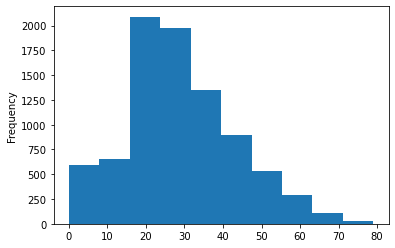

In [23]:
train_df["Age"].plot(kind="hist")

<AxesSubplot:xlabel='Age', ylabel='Count'>

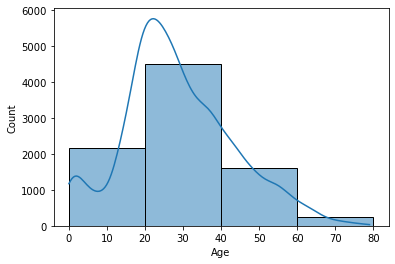

In [24]:
sns.histplot(train_df["Age"],binwidth=20,kde=True)

In [25]:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].median())

In [26]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
train_df.isnull().sum().sort_values(ascending=False)

ShoppingMall    208
VIP             203
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
RoomService     181
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
Transported       0
dtype: int64

In [28]:
train_df["VIP"].value_counts(dropna=False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [29]:
pd.isnull(train_df["VIP"])

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: bool

In [30]:
def impute_VIP(col):
    VIP=col[0]
    HomePlanet=col[1]
    if pd.isnull(VIP):
        if HomePlanet== "Earth":
            return False
    else:
        return VIP
        
    


In [31]:
train_df['VIP'] = train_df[['VIP','HomePlanet']].apply(impute_VIP,axis=1)
test_df['VIP'] = test_df[['VIP','HomePlanet']].apply(impute_VIP,axis=1)

In [32]:
train_df["VIP"].value_counts(dropna=False)

False    8409
True      199
NaN        85
Name: VIP, dtype: int64

In [33]:
train_df.isnull().sum().sort_values(ascending=False)

ShoppingMall    208
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
RoomService     181
VIP              85
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
Transported       0
dtype: int64

In [34]:
def impute_VIP(col):
    VIP=col[0]
    Age=col[1]
    if pd.isnull(VIP):
        if Age >= 18:
            return True
        else:
            return False
        
    else:
        return VIP
        

In [35]:
train_df['VIP'] = train_df[['VIP','Age']].apply(impute_VIP,axis=1)
test_df['VIP'] = test_df[['VIP','Age']].apply(impute_VIP,axis=1)

In [36]:
train_df["VIP"].value_counts(dropna=False)

False    8421
True      272
Name: VIP, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

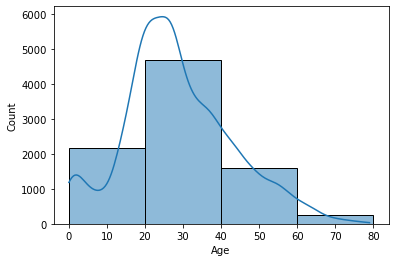

In [37]:
sns.histplot(train_df["Age"],binwidth=20,kde=True)

In [38]:
train_df.isnull().sum().sort_values(ascending=False)

ShoppingMall    208
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
RoomService     181
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Transported       0
dtype: int64

In [39]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.790291,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.341404,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [40]:
train_df[["Spa","RoomService","FoodCourt","VRDeck","ShoppingMall"]].loc[train_df["CryoSleep"]== True].sum()

# we can see where "CryoSleep" is True passenger do not spend any money on any facilities

Spa             0.0
RoomService     0.0
FoodCourt       0.0
VRDeck          0.0
ShoppingMall    0.0
dtype: float64

In [41]:
train_df[["Spa","RoomService","FoodCourt","VRDeck","ShoppingMall"]].loc[train_df["Age"] <= 12].sum()

#We can see children did not spend any money 

Spa             0.0
RoomService     0.0
FoodCourt       0.0
VRDeck          0.0
ShoppingMall    0.0
dtype: float64

In [42]:
def impute_other(col):
    service=col[0]
    CryoSleep=col[1]
    Age=col[2]
    
    if pd.isnull(service):
        if CryoSleep == True or Age <= 12:
            return 0 
    else:
        return service
        

In [43]:

train_df['RoomService'] = train_df[['RoomService','CryoSleep',"Age"]].apply(impute_other,axis=1)
train_df['FoodCourt'] = train_df[['FoodCourt','CryoSleep',"Age"]].apply(impute_other,axis=1)
train_df['Spa'] = train_df[['Spa','CryoSleep',"Age"]].apply(impute_other,axis=1)
train_df['ShoppingMall'] = train_df[['ShoppingMall','CryoSleep',"Age"]].apply(impute_other,axis=1)
train_df['VRDeck'] = train_df[['VRDeck','CryoSleep',"Age"]].apply(impute_other,axis=1)


test_df['RoomService'] = test_df[['RoomService','CryoSleep',"Age"]].apply(impute_other,axis=1)
test_df['FoodCourt'] = test_df[['FoodCourt','CryoSleep',"Age"]].apply(impute_other,axis=1)
test_df['Spa'] = test_df[['Spa','CryoSleep',"Age"]].apply(impute_other,axis=1)
test_df['ShoppingMall'] = test_df[['ShoppingMall','CryoSleep',"Age"]].apply(impute_other,axis=1)
test_df['VRDeck'] = test_df[['VRDeck','CryoSleep',"Age"]].apply(impute_other,axis=1)

In [44]:
train_df.isnull().sum().sort_values(ascending=False)

Name            200
Cabin           199
Spa             114
RoomService     107
VRDeck          107
FoodCourt       106
ShoppingMall    103
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Transported       0
dtype: int64

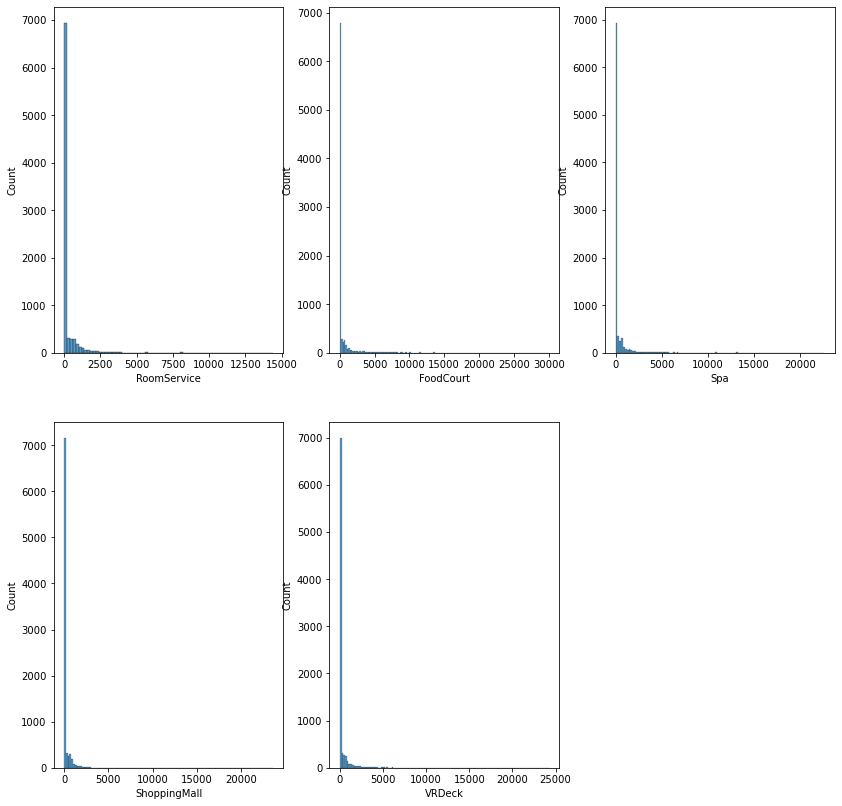

In [45]:
plt.figure(figsize=(14,14))
plt.subplot(2,3,1)
sns.histplot(train_df["RoomService"],bins=200,binwidth=200)
plt.subplot(2,3,2)
sns.histplot(train_df["FoodCourt"],bins=200,binwidth=200)
plt.subplot(2,3,3)
sns.histplot(train_df["Spa"],bins=200,binwidth=200)
plt.subplot(2,3,4)
sns.histplot(train_df["ShoppingMall"],bins=200,binwidth=200)
plt.subplot(2,3,5)
sns.histplot(train_df["VRDeck"],bins=200,binwidth=200)




plt.show()

#we can see average approx 200 spends on all facilities so we can fill rest Nan with 200

In [46]:
train_df.isnull().sum().sort_values(ascending=False)

Name            200
Cabin           199
Spa             114
RoomService     107
VRDeck          107
FoodCourt       106
ShoppingMall    103
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Transported       0
dtype: int64

In [47]:
train_df[["Spa","RoomService","FoodCourt","VRDeck","ShoppingMall"]]=train_df[["Spa","RoomService","FoodCourt","VRDeck","ShoppingMall"]].fillna(200)
test_df[["Spa","RoomService","FoodCourt","VRDeck","ShoppingMall"]]=test_df[["Spa","RoomService","FoodCourt","VRDeck","ShoppingMall"]].fillna(200)

In [48]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin           100
Name             94
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [49]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [50]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,Cancri,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [51]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [52]:
train_df[["Cabin_deck","Cabin_num","Cabin_side"]]=train_df["Cabin"].str.split("/",expand=True)
test_df[["Cabin_deck","Cabin_num","Cabin_side"]]=test_df["Cabin"].str.split("/",expand=True)

In [53]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [54]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,Cancri,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [55]:
train_df["Cabin_side"].value_counts()
#ca

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [56]:
def impute_cabin_deck(col):
    cabin_deck=col[0]
    HomePlanet=col[1]
    Cryosleep=col[2]
    
    if pd.isnull(cabin_deck):
        if HomePlanet == "Earth" and Cryosleep == True:
            
            return "G" 
        
        elif HomePlanet == "Mars" and Cryosleep == True:
            
            return "F"
        elif HomePlanet == "Europa" and Cryosleep == True:
            
            return "B"
            
         
        
   
    else:
        return cabin_deck

In [57]:
train_df["Cabin_deck"]=train_df[["Cabin_deck","HomePlanet","CryoSleep"]].apply(impute_cabin_deck,axis=1)
test_df["Cabin_deck"]=test_df[["Cabin_deck","HomePlanet","CryoSleep"]].apply(impute_cabin_deck,axis=1)

In [58]:
def impute_cabin_side(col):
    cabin_side=col[0]
    HomePlanet=col[1]
    Cryosleep=col[2]
    
    if pd.isnull(cabin_side):
        if HomePlanet == "Earth" and Cryosleep == True:
            return "P" 
        
        elif HomePlanet == "Mars" and Cryosleep == True:
            
            return "P"
        
        elif HomePlanet == "Europa" and Cryosleep == True:
            
            return "P"
         
        
   
    else:
        return cabin_side

In [59]:
train_df["Cabin_side"]=train_df[["Cabin_side","HomePlanet","CryoSleep"]].apply(impute_cabin_side,axis=1)
test_df["Cabin_side"]=test_df[["Cabin_side","HomePlanet","CryoSleep"]].apply(impute_cabin_side,axis=1)

In [60]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Cabin_deck      115
Cabin_num       199
Cabin_side      115
dtype: int64

In [61]:
train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Europa"].value_counts(dropna= False)

B      795
C      734
A      252
D      186
E      128
NaN     32
T        4
Name: Cabin_deck, dtype: int64

In [62]:
train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Earth"].value_counts(dropna = False)

G      2599
F      1684
E       418
NaN      61
C        13
B        13
D        10
A         4
T         1
Name: Cabin_deck, dtype: int64

In [63]:
train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Mars"].value_counts(dropna = False)

F      1125
E       330
D       282
NaN      22
Name: Cabin_deck, dtype: int64

In [64]:
train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Earth"]=train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Earth"].fillna("G")

test_df["Cabin_deck"].loc[test_df["HomePlanet"] == "Earth"]=test_df["Cabin_deck"].loc[test_df["HomePlanet"] == "Earth"].fillna("G")

In [65]:
train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Mars"]=train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Mars"].fillna("F")
test_df["Cabin_deck"].loc[test_df["HomePlanet"] == "Mars"]=test_df["Cabin_deck"].loc[test_df["HomePlanet"] == "Mars"].fillna("F")

In [66]:
train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Europa"]= train_df["Cabin_deck"].loc[train_df["HomePlanet"] == "Europa"].fillna("C")
test_df["Cabin_deck"].loc[test_df["HomePlanet"] == "Europa"]= test_df["Cabin_deck"].loc[test_df["HomePlanet"] == "Europa"].fillna("C")

In [67]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Cabin_deck        0
Cabin_num       199
Cabin_side      115
dtype: int64

In [68]:
train_df["Cabin_deck"].value_counts()

F    2831
G    2660
E     876
B     808
C     779
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [69]:
train_df["Cabin_side"].value_counts()

P    4290
S    4288
Name: Cabin_side, dtype: int64

In [70]:
def impute_cabin_side1(col):
    cabin_side=col[0]
    HomePlanet=col[1]
    
    
    if pd.isnull(cabin_side):
        if HomePlanet == "Earth":
            return "S" 
        
        elif HomePlanet == "Mars":
            
            return "P"
        
        elif HomePlanet == "Europa":
            
            return "P"
         
        
   
    else:
        return cabin_side

In [71]:
train_df["Cabin_side"]=train_df[["Cabin_side","HomePlanet"]].apply(impute_cabin_side1,axis=1)
test_df["Cabin_side"]=test_df[["Cabin_side","HomePlanet"]].apply(impute_cabin_side1,axis=1)

In [72]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Cabin_deck        0
Cabin_num       199
Cabin_side        0
dtype: int64

In [73]:
train_df=train_df.drop(["Cabin","Name","Cabin_num","PassengerId"],axis=1)
test_df=test_df.drop(["Cabin","Name","Cabin_num","PassengerId"],axis=1)

In [74]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [75]:
train_df["Cabin_side"].value_counts()

S    4349
P    4344
Name: Cabin_side, dtype: int64

## EDA- Exploratory Data Analysis

In [76]:
pd.crosstab(train_df["Transported"],train_df["HomePlanet"],normalize= True)*100

#Most people who are successsfully Transported are from planet Earth and also Most People who are Failed to transport also from Earth

HomePlanet,Earth,Europa,Mars
Transported,,,
False,31.623145,8.363051,9.651444
True,23.628207,16.150926,10.583228


In [77]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [78]:
categorical_data=train_df[["HomePlanet","CryoSleep","Destination","VIP"]]

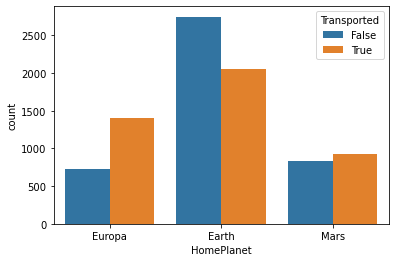

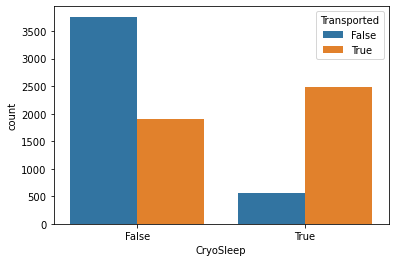

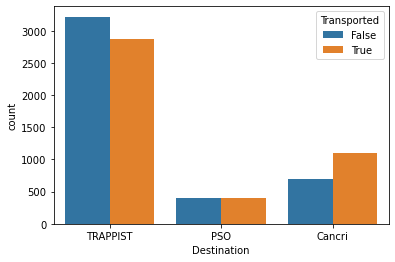

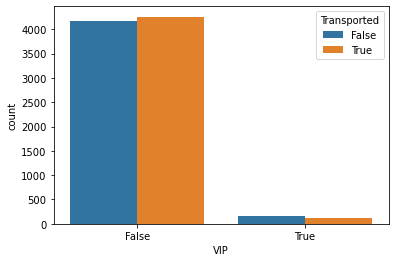

In [79]:
for i in categorical_data:
    sns.countplot(x=i,hue ="Transported",data=train_df)
    plt.show()
    
    

In [80]:
train_df.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Cabin_deck       object
Cabin_side       object
dtype: object

In [81]:
numerical_var=train_df.select_dtypes(include="float64").columns

In [82]:
numerical_var

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

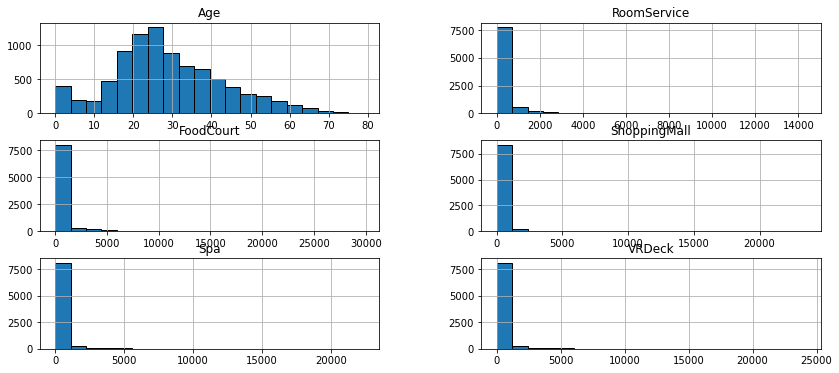

In [83]:
train_df[numerical_var].hist(edgecolor="black",bins=20,figsize=(14,6),layout=(3,2))

In [84]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


Text(0.5, 1.0, 'Age by Passenger Class, Titanic')

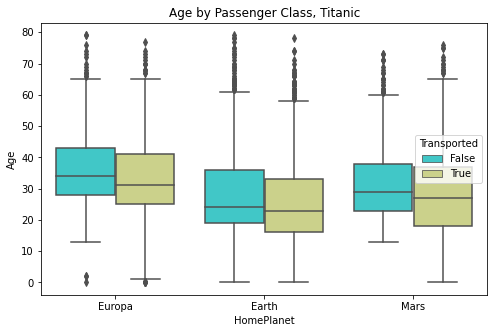

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HomePlanet',y='Age',hue="Transported",data=train_df,palette='rainbow')
plt.title("Age by Passenger Class, Titanic")

In [86]:
train_df.corr()


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.071323,-0.059629,-0.246989,-0.207117,-0.210801,-0.200099,-0.194386,0.460132
Age,-0.071323,1.000000,0.105145,0.068942,0.127734,0.033766,0.121217,0.100101,-0.074233
VIP,-0.059629,0.105145,1.000000,0.067852,0.124628,0.006679,0.056589,0.117891,-0.021125
RoomService,-0.246989,0.068942,0.067852,1.000000,-0.014274,0.055044,0.010944,-0.017692,-0.243163
FoodCourt,-0.207117,0.127734,0.124628,-0.014274,1.000000,-0.012625,0.221659,0.225031,0.044953
ShoppingMall,-0.210801,0.033766,0.006679,0.055044,-0.012625,1.000000,0.015174,-0.005684,0.007404
Spa,-0.200099,0.121217,0.056589,0.010944,0.221659,0.015174,1.000000,0.148638,-0.219595
VRDeck,-0.194386,0.100101,0.117891,-0.017692,0.225031,-0.005684,0.148638,1.000000,-0.205800
Transported,0.460132,-0.074233,-0.021125,-0.243163,0.044953,0.007404,-0.219595,-0.205800,1.000000


<AxesSubplot:>

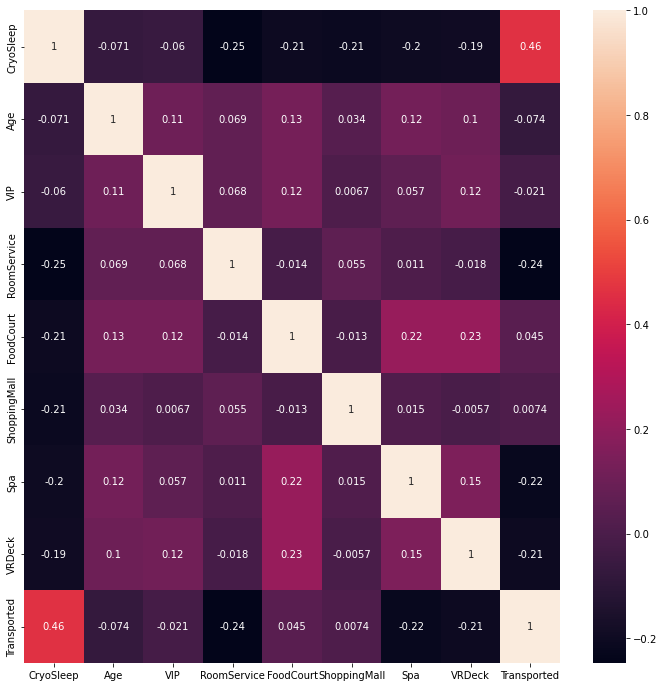

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(),annot=True)

#cryosleep and transported are highly correlated

In [88]:
## Feature Engineering


In [89]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [90]:
from sklearn.compose import ColumnTransformer

In [91]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [92]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [93]:
df_HomePlanet_destination=pd.get_dummies(train_df[["HomePlanet","Destination","Cabin_deck","Cabin_side"]],drop_first=True)
df_test_HomePlanet_destination=pd.get_dummies(test_df[["HomePlanet","Destination","Cabin_deck","Cabin_side"]],drop_first=True)

In [94]:
train_df=pd.concat([train_df,df_HomePlanet_destination],axis=1)
test_df=pd.concat([test_df,df_test_HomePlanet_destination],axis=1)

In [95]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,1,0,0,0,0,1,0,0,1
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,1,0,0,0,0,0,0,0,1
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,1,0,0,0,0,0,0,0,1
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,1,0,0,0,0,1,0,0,1


In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
Le=LabelEncoder()

In [98]:
encodedtransported=Le.fit_transform(train_df["Transported"])

In [99]:
encodedtransported=pd.DataFrame(encodedtransported,columns=["TransPorted"])

In [100]:
encodedtransported

,TransPorted
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [101]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
0,Earth,True,TRAPPIST,27.0,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
1,Earth,False,TRAPPIST,19.0,False,0.0,9.0,0.0,2823.0,0.0,...,0,1,0,0,0,0,1,0,0,1
2,Europa,True,Cancri,31.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,Europa,False,TRAPPIST,38.0,False,0.0,6652.0,0.0,181.0,585.0,...,0,1,0,1,0,0,0,0,0,1
4,Earth,False,TRAPPIST,20.0,False,10.0,0.0,635.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1


In [102]:
train_df=pd.concat([train_df,encodedtransported],axis=1)

In [103]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,TransPorted
0,Europa,False,TRAPPIST,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,0
1,Earth,False,TRAPPIST,24.0,False,109.0,9.0,25.0,549.0,44.0,...,1,0,0,0,0,1,0,0,1,1
2,Europa,False,TRAPPIST,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,0,0,0,0,0,0,0,1,0
3,Europa,False,TRAPPIST,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,0,0,0,0,0,0,0,1,0
4,Earth,False,TRAPPIST,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,0,0,0,0,1,0,0,1,1


In [104]:
dic1={False : 0,True : 1}

In [105]:
train_df["CryoSleep"]=train_df["CryoSleep"].map(dic1)
train_df["VIP"]=train_df["VIP"].map(dic1)
test_df["CryoSleep"]=test_df["CryoSleep"].map(dic1)
test_df["VIP"]=test_df["VIP"].map(dic1)


In [106]:
train_df=train_df.drop(["Transported","HomePlanet","Destination","Cabin_deck","Cabin_side"],axis=1)
test_df=test_df.drop(["HomePlanet","Destination","Cabin_deck","Cabin_side"],axis=1)

In [107]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,TransPorted
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,...,1,0,0,0,0,1,0,0,1,1


In [108]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,0,1,0,1,0,0,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


In [109]:
train_df.shape

(8693, 21)

In [110]:
test_df.shape

(4277, 20)

In [111]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,TransPorted
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,...,1,0,0,0,0,1,0,0,1,1


<AxesSubplot:xlabel='TransPorted', ylabel='count'>

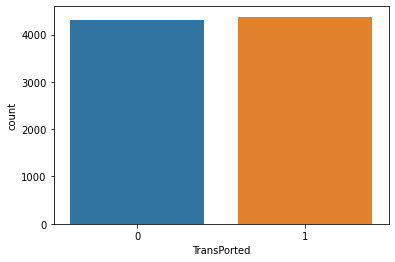

In [112]:
sns.countplot(train_df["TransPorted"])

#In Transported True and false are almost equal so we can say our data is Balanced

In [113]:
pd.set_option('display.max_columns', None)

In [114]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,TransPorted
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,0,0,1,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0,0,0,1,0,0,1,1


In [115]:
Y=train_df["TransPorted"]

In [116]:
train_df=train_df.drop(["TransPorted"],axis=1)

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
norm=MinMaxScaler()

In [119]:
train_df_norm=norm.fit_transform(train_df)

In [120]:
test_df_norm=norm.fit_transform(test_df)

In [121]:
train_df_scaled=pd.DataFrame(train_df_norm,columns=train_df.columns)

In [122]:
train_df_scaled.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [123]:
test_df_scaled=pd.DataFrame(test_df_norm,columns=test_df.columns)

In [124]:
test_df_scaled.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
0,1.0,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [125]:
#train test splitting
from sklearn.model_selection import train_test_split

In [126]:
X=train_df_scaled


In [127]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=27)

In [128]:
x_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
1858,0.0,0.367089,0.0,0.100091,0.000168,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1012,0.0,0.417722,0.0,0.048440,0.000000,0.002554,0.025170,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
740,0.0,0.240506,0.0,0.000000,0.000067,0.059552,0.000000,0.000746,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4785,0.0,0.594937,0.0,0.005793,0.000034,0.000000,0.029186,0.000124,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5478,1.0,0.734177,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [129]:
y_train.head()

1858    0
1012    0
740     1
4785    1
5478    1
Name: TransPorted, dtype: int64

In [130]:
x_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
6464,0.0,0.189873,0.0,0.000000,0.017845,0.001234,0.00000,0.006754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
687,1.0,0.025316,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7178,1.0,0.506329,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2763,0.0,0.481013,0.0,0.000000,0.105155,0.000000,0.00116,0.000124,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5002,0.0,0.177215,0.0,0.056467,0.000000,0.002511,0.00000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [131]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6954, 20)
(1739, 20)
(6954,)
(1739,)


## Model Building

## Model-1 : Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [133]:
Lor=LogisticRegression()

In [134]:
Model1=Lor.fit(x_train,y_train)

In [135]:
#coefficient
Model1.coef_

array([[  1.99769339,  -1.06035755,  -0.21152788,  -7.73064745,
          4.19324044,   4.2511203 , -10.46236332,  -9.78884094,
          0.85791937,   0.31002303,  -0.38408447,  -0.32878939,
          0.82199211,   1.04829325,   0.2856256 ,  -0.01077303,
          0.44469337,  -0.04662031,  -0.17803147,   0.50833848]])

In [136]:
Model1.intercept_

array([-0.5212417])

In [137]:
y_pred1=Model1.predict(x_test)

In [138]:
y_pred1

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [139]:
accuracy_score1=accuracy_score(y_test,y_pred1)

In [140]:
accuracy_score1

0.750431282346176

In [141]:
#lets check cross validation score with grid search cv

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
grid1={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"max_iter":[100,200,400]}

In [144]:
clf1 = GridSearchCV(Lor, grid1, cv =10, scoring='accuracy')

In [145]:
model1=clf1.fit(x_train,y_train)

In [146]:
print(model1.best_params_)
print(model1.best_score_)

{'C': 1000.0, 'max_iter': 100, 'penalty': 'l2'}
0.7950828991978831


In [147]:
y_pred1=model1.predict(x_test)

In [148]:
model1_accuracy_score=accuracy_score(y_test,y_pred1)

In [149]:
model1_accuracy_score

0.7768832662449684

In [150]:
confusion_matrix(y_test,y_pred1)
#False positive and false Negative is high so we should go for another Model

array([[669, 199],
       [189, 682]], dtype=int64)

In [151]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       868
           1       0.77      0.78      0.78       871

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## Model2 : Naive Bias Classifier

In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
gnb=GaussianNB()

In [154]:
grid2={"var_smoothing":np.logspace(0,-9, num=100)}

In [155]:
NBC=GridSearchCV(gnb,param_grid=grid2,verbose=1,cv=10)

In [156]:
Model2=NBC.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [157]:
print(Model2.best_estimator_)
print(Model2.best_score_)

GaussianNB(var_smoothing=0.006579332246575682)
0.7411521127925246


In [158]:
y_pred2=Model2.predict(x_test)

In [159]:
accuracy_score(y_test,y_pred2)

0.7377803335250144

In [160]:
confusion_matrix(y_test,y_pred2)

#False positive and false Negative is high so we should go for another Model

array([[605, 263],
       [193, 678]], dtype=int64)

In [161]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       868
           1       0.77      0.78      0.78       871

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## Model3:KNN Classifiers

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
KNN=KNeighborsClassifier()

In [164]:
grid3={"n_neighbors":[10,11,12],"weights" :["uniform", "distance"]}

In [165]:
KNN=GridSearchCV(KNN,param_grid=grid3,cv=10,verbose=1)

In [166]:
Model3=KNN.fit(x_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [167]:
print(Model3.best_params_)

{'n_neighbors': 11, 'weights': 'uniform'}


In [168]:
y_pred3=Model3.predict(x_test)

In [169]:
accuracy_score(y_test,y_pred3)

0.7544565842438183

In [170]:
confusion_matrix(y_test,y_pred3)
#False positive and false Negative is high so we should go for another Model

array([[709, 159],
       [268, 603]], dtype=int64)

In [171]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       868
           1       0.77      0.78      0.78       871

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## Decision Tree classifier

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
DT=DecisionTreeClassifier()

In [174]:
grid4={"criterion":["gini","entropy"],"max_depth":[100,200,300],"max_features":[10,15,19,21]}

In [175]:
DTC=GridSearchCV(DT,param_grid=grid4,cv=10,verbose=1)

In [176]:
Model4=DTC.fit(x_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [177]:
print(Model4.best_params_)
print(Model4.best_score_)

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 15}
0.7519383114198297


In [178]:
Model4

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 200, 300],
                         'max_features': [10, 15, 19, 21]},
             verbose=1)

In [179]:
y_pred4=Model4.predict(x_test)

In [180]:
accuracy_score(y_test,y_pred4)

0.7418056354226567

In [181]:
confusion_matrix(y_test,y_pred4)

array([[643, 225],
       [224, 647]], dtype=int64)

In [182]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       868
           1       0.77      0.78      0.78       871

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## Random Forest Classifiers

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
RFC=RandomForestClassifier()

In [185]:
grid5={"n_estimators":[100,400],"criterion":["gini","entropy"],"max_depth":[50,100]}

In [186]:
RFC=GridSearchCV(RFC,param_grid=grid5,cv=10,verbose=1)

In [187]:
Model5=RFC.fit(x_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [188]:
print(Model5.best_params_)
print(Model5.best_score_)

{'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 400}
0.798101587695361


In [189]:
y_pred5=Model5.predict(x_test)

In [190]:
accuracy_score(y_test,y_pred5)

0.7889591719378953

In [191]:
confusion_matrix(y_test,y_pred5)

array([[708, 160],
       [207, 664]], dtype=int64)

## SVM Classifier

In [192]:
from sklearn import svm

In [193]:
svc=svm.SVC()

In [194]:
grid6={"kernel":["linear","rbf","polynomial","tanh"]}

In [195]:
svc1=GridSearchCV(svc,param_grid=grid6,cv=10)

In [196]:
Model6=svc1.fit(x_train,y_train)

In [197]:
Model6.best_params_

{'kernel': 'linear'}

In [198]:
Model6.best_score_

0.7598486727859093

In [199]:
y_pred6=Model6.predict(x_test)

In [200]:
accuracy_score(y_test,y_pred6)

0.7360552041403106

In [201]:
confusion_matrix(y_test,y_pred6)

array([[727, 141],
       [318, 553]], dtype=int64)

## XG BOOST

In [202]:
from xgboost import XGBClassifier

In [203]:
xgbc=XGBClassifier(tree_method='gpu_hist')

In [204]:
grid7={"eta" : [0.1],"max_depth" :[10] ,"n_estimators": [100,200,300]}

In [205]:
xgbc=GridSearchCV(xgbc,param_grid=grid7,cv=3)

In [206]:
Model7=xgbc.fit(x_train,y_train)


In [207]:
y_pred7=Model7.predict(x_test)

In [208]:
accuracy_score(y_test,y_pred7)

0.79700977573318

In [209]:
Model7.best_params_

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [210]:
confusion_matrix(y_test,y_pred7)

array([[702, 166],
       [187, 684]], dtype=int64)

In [211]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       868
           1       0.80      0.79      0.79       871

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [212]:
# We can see XGBOOST is giving best result among all so we will predict our output using XGBOOST

In [213]:
test_df_scaled.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO,Destination_TRAPPIST,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S
0,1.0,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [214]:
y_test_op=Model7.predict(test_df_scaled)

In [215]:
output=pd.DataFrame(y_test_op,columns=["Transported"])

In [216]:
output.head()

,Transported
0,1
1,0
2,1
3,1
4,1


In [217]:
output.to_csv("foo.csv")

In [218]:
dict1={1 : "True", 0 : "False"}

In [219]:
output["Transported"]=output["Transported"].map(dict1)

In [237]:
output.head()

,Transported
0,True
1,False
2,True
3,True
4,True


In [238]:
sample_submission=pd.read_csv("sample_submission (1).csv")

In [241]:
sample_submission.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [240]:
sample_submission=sample_submission.drop(["Transported"],axis=1)


In [242]:
sample_submission=pd.concat([sample_submission,output],axis=1)

In [243]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [245]:
sample_submission.to_csv("sample_submission.csv", index=False)

## AUC-ROC Curve

In [222]:
from sklearn.metrics import roc_curve

In [223]:
pred_prob1=Model1.predict_proba(x_test) #Logistic regression
pred_prob2=Model2.predict_proba(x_test) # Naive Bias
pred_prob3=Model3.predict_proba(x_test)#KNN Classifier
pred_prob4=Model4.predict_proba(x_test) #Decision Tree
pred_prob5=Model5.predict_proba(x_test)#Random Forest
pred_prob7=Model7.predict_proba(x_test) #XG BOOST

In [224]:
pred_prob1

array([[0.52108117, 0.47891883],
       [0.26524125, 0.73475875],
       [0.36258729, 0.63741271],
       ...,
       [0.66382097, 0.33617903],
       [0.8117781 , 0.1882219 ],
       [0.06379262, 0.93620738]])

In [225]:
fpr1,tpr1,thresh1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)
fpr3,tpr3,thresh3=roc_curve(y_test,pred_prob3[:,1],pos_label=1)
fpr4,tpr4,thresh4=roc_curve(y_test,pred_prob4[:,1],pos_label=1)
fpr5,tpr5,thresh5=roc_curve(y_test,pred_prob5[:,1],pos_label=1)
fpr7,tpr7,thresh7=roc_curve(y_test,pred_prob7[:,1],pos_label=1)

In [226]:
random_prob=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_ =roc_curve(y_test,random_prob,pos_label=1)

In [227]:
from sklearn.metrics import roc_auc_score

In [228]:
auc_score1=roc_auc_score(y_test,pred_prob1[:,1])#Logistic regression
auc_score2=roc_auc_score(y_test,pred_prob2[:,1])# Naive Bias
auc_score3=roc_auc_score(y_test,pred_prob3[:,1]) #KNN Classifier
auc_score4=roc_auc_score(y_test,pred_prob4[:,1]) #Decision tree
auc_score5=roc_auc_score(y_test,pred_prob5[:,1]) # XG BOOST
auc_score7=roc_auc_score(y_test,pred_prob7[:,1]) #XG BOOST

In [229]:
print("AUC_SCORE for Logistic regression", auc_score1)
print("AUC_SCORE for Naive Bias", auc_score2)
print("AUC_SCORE for KNN", auc_score3)
print("AUC_SCORE for Decision Tree", auc_score4)
print("AUC_SCORE for Random Forest", auc_score5)
print("AUC_SCORE for XG BOOST", auc_score7)

AUC_SCORE for Logistic regression 0.8365285412709582
AUC_SCORE for Naive Bias 0.7958779304470205
AUC_SCORE for KNN 0.8327727279942013
AUC_SCORE for Decision Tree 0.7617548556402672
AUC_SCORE for Random Forest 0.8675399588375035
AUC_SCORE for XG BOOST 0.8858454977857964


In [230]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

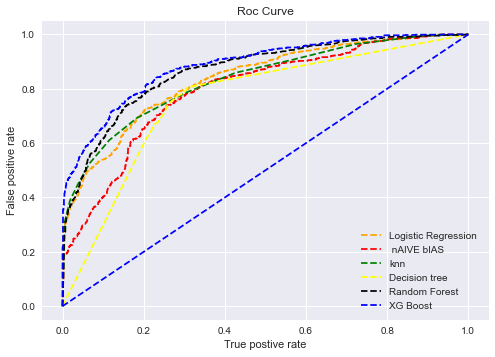

In [231]:
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Logistic Regression ')
plt.plot(fpr2,tpr2,linestyle='--',color='red',label=' nAIVE bIAS')
plt.plot(fpr3,tpr3,linestyle='--',color='green',label='knn')
plt.plot(fpr4,tpr4,linestyle='--',color='yellow',label='Decision tree')
plt.plot(fpr5,tpr5,linestyle='--',color='black',label='Random Forest')
plt.plot(fpr7,tpr7,linestyle='--',color='blue',label='XG Boost')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('Roc Curve')
plt.xlabel('True postive rate')
plt.ylabel('False positive rate')
plt.legend(loc='best')
plt.show();

In [232]:
# Best result given by algorithm XGBOOST